### Importing and Reading CSV

#### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

#### Reading the CSV file and changing Order Date to yyyy-mm format

In [2]:
gs_df = pd.read_csv('Global2.csv')
gs_df['Order Date'] = pd.to_datetime(gs_df['Order Date'], format='%d-%m-%Y').dt.strftime('%Y-%m')
gs_df.head()

,Order Date,Segment,Market,Sales,Quantity,Profit
0,2012-07,Consumer,US,2309.650,7,762.1845
1,2013-02,Corporate,APAC,3709.395,9,-288.7650
2,2013-10,Consumer,APAC,5175.171,9,919.9710
3,2013-01,Home Office,EU,2892.510,5,-96.5400
4,2013-11,Consumer,Africa,2832.960,8,311.5200


### Data preparation

#### Changing the Order Date type to TimeStamp

In [3]:
gs_df['Order Date'] = pd.to_datetime(gs_df['Order Date'], format='%Y-%m')
gs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 6 columns):
Order Date    51290 non-null datetime64[ns]
Segment       51290 non-null object
Market        51290 non-null object
Sales         51290 non-null float64
Quantity      51290 non-null int64
Profit        51290 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 2.3+ MB


#### Creating a new column Market Segment by concatenating columns Market and Segment

In [4]:
gs_df['Market Segment'] = gs_df.Market + '-' + gs_df.Segment
gs_df.head()

,Order Date,Segment,Market,Sales,Quantity,Profit,Market Segment
0,2012-07-01,Consumer,US,2309.650,7,762.1845,US-Consumer
1,2013-02-01,Corporate,APAC,3709.395,9,-288.7650,APAC-Corporate
2,2013-10-01,Consumer,APAC,5175.171,9,919.9710,APAC-Consumer
3,2013-01-01,Home Office,EU,2892.510,5,-96.5400,EU-Home Office
4,2013-11-01,Consumer,Africa,2832.960,8,311.5200,Africa-Consumer


#### Grouping data by Order Date

In [5]:
gs_tab = pd.pivot_table(gs_df, index=['Order Date'], values=['Profit'], columns=['Market Segment'], aggfunc=sum)
gs_tab

Profit                                                  \
Market Segment APAC-Consumer APAC-Corporate APAC-Home Office Africa-Consumer   
Order Date                                                                     
2011-01-01          991.2825        11.5998          86.4423         475.683   
2011-02-01         1338.8688      4358.8254        -417.4128        1441.926   
2011-03-01         3747.1632      1213.3386         923.7492         322.140   
2011-04-01         3846.4746        71.0265         657.1080         292.122   
2011-05-01         3639.9423      2534.1672        -272.1717         110.004   
2011-06-01         4328.2596      1435.8294        3452.1018       -1290.639   
2011-07-01         1258.9617       525.4647         -42.0498         621.168   
2011-08-01          775.8066      4070.5581         775.7616         232.917   
2011-09-01         5181.4449      1952.4675         623.3595         -86.163   
2011-10-01         6911.9970      5452.2429        1131.9597         612.942   
2011-11-01          221.5539      2154.5313        6574.6911        -221.124   
2011-12-01         4004.3211      8126.9478        1384.9611         642.921   
2012-01-01         4810.1535      2224.6740         709.7085         762.894   
2012-02-01         2967.1281       659.0961         335.0127        -352.278   
2012-03-01          146.4261      1108.3668        1381.6839         774.156   
2012-04-01         2368.1721      1873.7997         -97.5930         347.982   
2012-05-01         6114.3312      4751.5857        3500.2146        -342.684   
2012-06-01         4790.0052      4853.2323         124.5438        2357.850   
2012-07-01          606.0216      -131.9754         317.1483         971.247   
2012-08-01         7600.9977      4136.7153        2078.2506         859.734   
2012-09-01         2401.1736      1440.7560        -181.9125        1617.435   
2012-10-01         7759.0233      1913.3238        3178.9056        2212.704   
2012-11-01         5676.1440      1308.7617        1234.4160        1154.934   
2012-12-01         3835.9467      3188.5167         428.0961        -427.119   
2013-01-01         3555.8820      2789.8638         293.7639         459.837   
2013-02-01         3225.6978       203.9898         884.3511        2101.842   
2013-03-01         5333.4909      2405.1768        1853.6781         397.629   
2013-04-01         2304.9297       576.3489         657.9576         360.393   
2013-05-01         5004.9900      1080.3939        2248.8078         384.963   
2013-06-01        12689.2389      5407.8054        2203.7766         669.594   
2013-07-01         3417.3747      2706.1569        1828.2861        3180.492   
2013-08-01         3856.6239      5242.6287        2526.1674         938.934   
2013-09-01         8307.3735      5859.4245         -72.5928        2074.941   
2013-10-01         6231.6432      1407.9099        2974.9104         128.148   
2013-11-01         6932.1384      2917.8372        3621.8820        1874.955   
2013-12-01         4783.6104      4462.6371        3378.9714        -792.147   
2014-01-01         4893.3396      1287.2886        -772.0530        2684.742   
2014-02-01         1151.9886      1895.7504         918.6291        -562.335   
2014-03-01         6598.9896       623.5428        2962.1511        -136.956   
2014-04-01         2275.9362      2474.7813        1806.8562        -370.251   
2014-05-01         4780.1628      2469.6885        2018.5770        4109.970   
2014-06-01         6724.2411      4348.8798         701.9766        2958.252   
2014-07-01         2732.4828      2874.3051        2064.9264         737.898   
2014-08-01         5050.6929      1722.2874        2211.4455        3934.101   
2014-09-01         5758.2162      5392.7694        7290.0429        3345.822   
2014-10-01        11824.2486      4155.1648        5850.4515        2278.191   
2014-11-01        12869.9883      5693.9367        5344.7532        3824.202   
2014-12-01         719

#### Splitting data into train and test data sets

In [6]:
train_len = 42
train_df = gs_tab[:train_len]
test_df = gs_tab[train_len:]

#### Coefficient of Variance (CoV) calculation for every Market Segment

In [7]:
train_df.std()/train_df.mean()

        Market Segment    
Profit  APAC-Consumer         0.603633
        APAC-Corporate        0.740799
        APAC-Home Office      1.061530
        Africa-Consumer       1.446661
        Africa-Corporate      1.685008
        Africa-Home Office    2.013987
        Canada-Consumer       1.497032
        Canada-Corporate      1.219189
        Canada-Home Office    2.245148
        EMEA-Consumer         2.749927
        EMEA-Corporate        6.861820
        EMEA-Home Office      6.140222
        EU-Consumer           0.655334
        EU-Corporate          0.697702
        EU-Home Office        1.128192
        LATAM-Consumer        0.688935
        LATAM-Corporate       0.890930
        LATAM-Home Office     1.359984
        US-Consumer           1.108571
        US-Corporate          1.039660
        US-Home Office        1.231887
dtype: float64

**Observation**
- Based on the Above table and graphs, the `most profitable` Market Segment is `APAC-Consumer`. 
- `APAC-Consumer` has `lowest CoV` value when compared to other Market Segment.

#### Picking the data specific to APAC-Consumer Market Segment and creating a ew dataframe

In [8]:
APAC_Consumer = gs_df.loc[gs_df['Market Segment'] == 'APAC-Consumer']
APAC_Consumer = pd.pivot_table(APAC_Consumer, index=['Order Date'], values=['Sales', 'Quantity', 'Profit'], aggfunc=sum)
APAC_Consumer.head()

,Profit,Quantity,Sales
Order Date,,,
2011-01-01,991.2825,214,15711.7125
2011-02-01,1338.8688,151,12910.8588
2011-03-01,3747.1632,283,19472.5632
2011-04-01,3846.4746,148,15440.3046
2011-05-01,3639.9423,244,24348.9723


### Time Series Analysis for Sales forecast 

#### Time Series plot for Sales

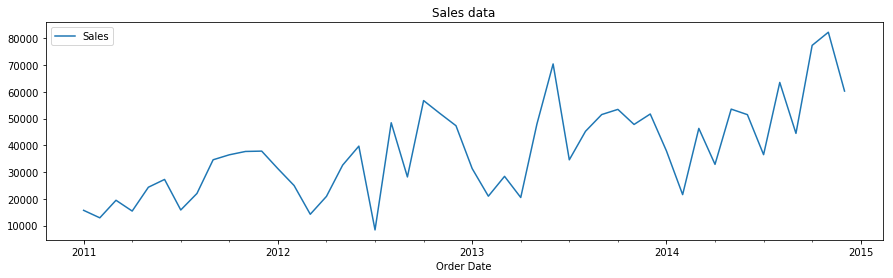

In [9]:
APAC_Consumer.plot(y='Sales', figsize=(15,4))
plt.legend(loc='best')
plt.title('Sales data')
plt.show()

### Time Series Decomposition
#### 1. Additive

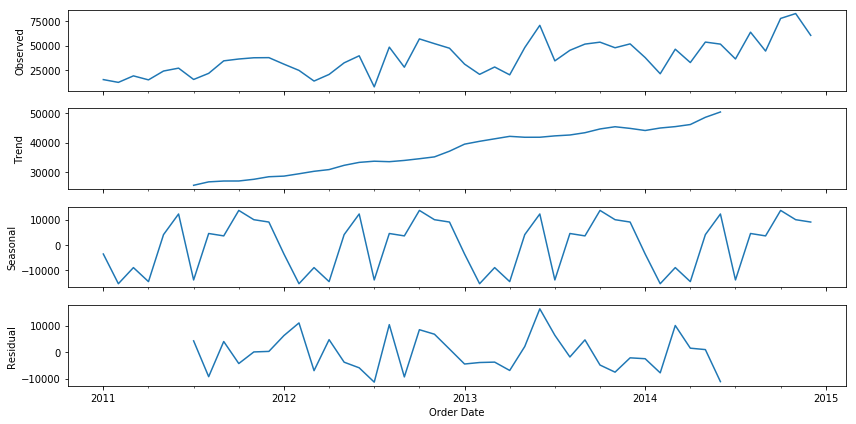

In [10]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 12, 6
decomposition = sm.tsa.seasonal_decompose(APAC_Consumer.Sales, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

#### 2. Multiplicative

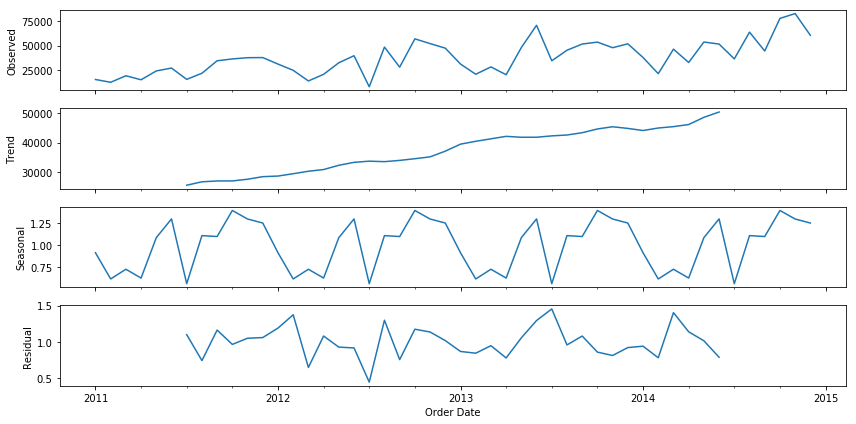

In [11]:
rcParams['figure.figsize'] = 12,6
decomposition = sm.tsa.seasonal_decompose(APAC_Consumer.Sales, model='multiplicative')
decomposition.plot()
plt.show()

#### Splitting data into train and test data set

In [12]:
train_len = 42
train_df = APAC_Consumer[:train_len]
test_df = APAC_Consumer[train_len:]

### Smoothing Techniques
#### 1. Naive Method

In [13]:
y_naive = test_df.copy()
y_naive['Naive Forecast'] = train_df['Sales'][train_len-1]

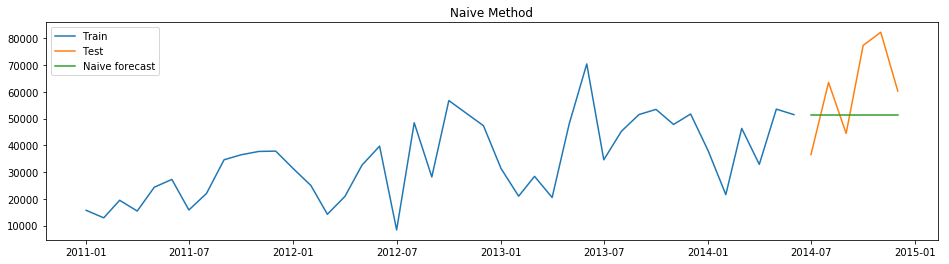

In [14]:
## plot train, test and forecast
plt.figure(figsize=(16,4))
plt.plot(train_df['Sales'], label='Train')
plt.plot(test_df['Sales'], label='Test')
plt.plot(y_naive['Naive Forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [15]:
mape = np.round(np.mean(np.abs(test_df['Sales'] - y_naive['Naive Forecast'])/test_df['Sales'])*100, 2)

naive_result = pd.DataFrame({'Method': ['Naive method'], 'MAPE': mape})
naive_result

,Method,MAPE
0,Naive method,26.86


#### 2. Simple Average Method

In [16]:
y_avg = test_df.copy()
y_avg['Avg Forecast'] = train_df['Sales'].mean()

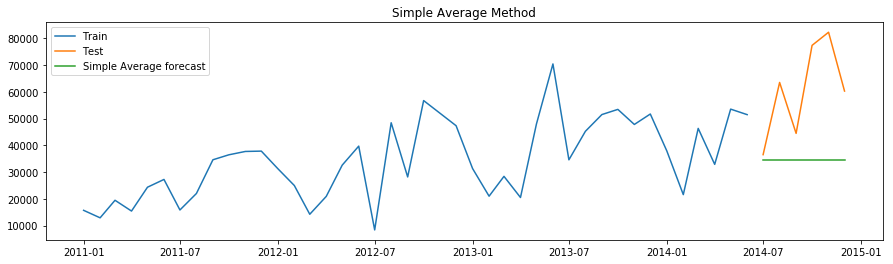

In [17]:
## plot train, test and forecast
plt.figure(figsize=(15,4))
plt.plot(train_df['Sales'], label='Train')
plt.plot(test_df['Sales'], label='Test')
plt.plot(y_avg['Avg Forecast'], label='Simple Average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [18]:
mape = np.round(np.mean(np.abs(test_df['Sales'] - y_avg['Avg Forecast'])/test_df['Sales'])*100, 2)

avg_result = pd.DataFrame({'Method': ['Simple Average method'], 'MAPE': mape})
results = pd.concat([naive_result, avg_result])
results

,Method,MAPE
0,Naive method,26.86
0,Simple Average method,38.18


#### 3. Simple Moving Average Method

In [19]:
y_sma = APAC_Consumer.copy()
ma_window = 3
y_sma['sma forecast'] = APAC_Consumer['Sales'].rolling(ma_window).mean()
y_sma['sma forecast'][train_len:] = y_sma['sma forecast'][train_len]

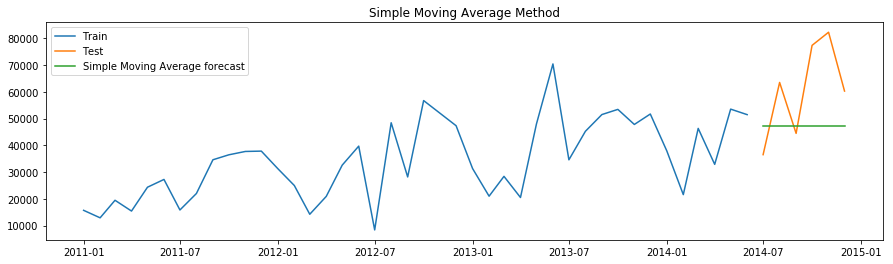

In [20]:
## plot train, test and forecast
plt.figure(figsize=(15,4))
plt.plot(train_df['Sales'], label='Train')
plt.plot(test_df['Sales'], label='Test')
plt.plot(y_sma['sma forecast'][train_len:], label='Simple Moving Average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [21]:
mape = np.round(np.mean(np.abs(test_df['Sales'] - y_sma['sma forecast'][train_len:])/test_df['Sales'])*100, 2)

sma_result = pd.DataFrame({'Method': ['Simple Moving Average method'], 'MAPE': mape})
results = pd.concat([results, sma_result])
results

,Method,MAPE
0,Naive method,26.86
0,Simple Average method,38.18
0,Simple Moving Average method,27.40


#### 4. Simple Exponential Smoothing Technique

In [22]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train_df['Sales'])
model_fit = model.fit(smoothing_level=0.5)
model_fit.params

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


{'smoothing_level': 0.5,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 16028.712500000003,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [23]:
y_ses = test_df.copy()
y_ses['SES Forecast'] = model_fit.forecast(6) 

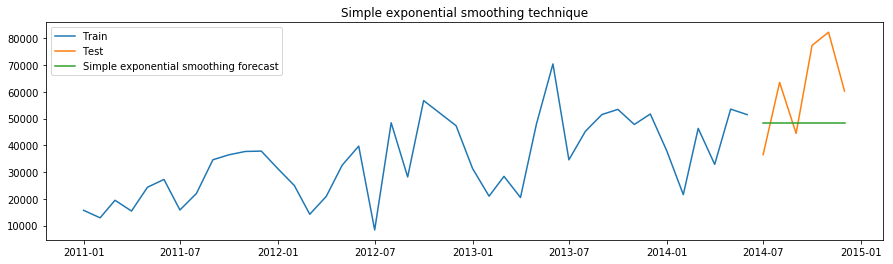

In [24]:
## plot train, test and forecast
plt.figure(figsize=(15,4))
plt.plot(train_df['Sales'], label='Train')
plt.plot(test_df['Sales'], label='Test')
plt.plot(y_ses['SES Forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple exponential smoothing technique')
plt.show()

In [25]:
mape = np.round(np.mean(np.abs(test_df['Sales'] - y_ses['SES Forecast'])/test_df['Sales'])*100, 2)

ses_result = pd.DataFrame({'Method': ['Simple exponential smoothing'], 'MAPE': mape})
results = pd.concat([results, ses_result])
results

,Method,MAPE
0,Naive method,26.86
0,Simple Average method,38.18
0,Simple Moving Average method,27.40
0,Simple exponential smoothing,27.28


#### 5. Holt's exponential smoothing technique

In [26]:
from statsmodels.tsa.holtwinters import  ExponentialSmoothing

model = ExponentialSmoothing(np.array(train_df['Sales']), seasonal_periods=5, trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.1, smoothing_slope=0.1, optimized=False)
model_fit.params

{'smoothing_level': 0.1,
 'smoothing_slope': 0.1,
 'smoothing_seasonal': None,
 'damping_slope': nan,
 'initial_level': 15711.712500000003,
 'initial_slope': -2800.8537000000033,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [27]:
y_holt = test_df.copy()
y_holt['hes forecast'] = model_fit.forecast(6)

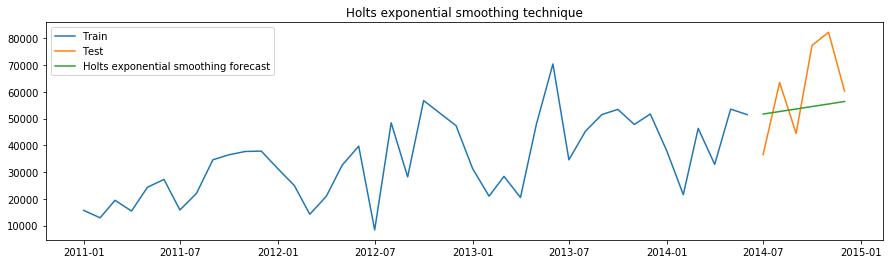

In [28]:
## plot train, test and forecast
plt.figure(figsize=(15,4))
plt.plot(train_df['Sales'], label='Train')
plt.plot(test_df['Sales'], label='Test')
plt.plot(y_holt['hes forecast'], label='Holts exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holts exponential smoothing technique')
plt.show()

In [29]:
mape = np.round(np.mean(np.abs(test_df['Sales'] - y_holt['hes forecast'])/test_df['Sales'])*100, 2)

holt_result = pd.DataFrame({'Method': ['Holt exponential smoothing'], 'MAPE': mape})
results = pd.concat([results, holt_result])
results

,Method,MAPE
0,Naive method,26.86
0,Simple Average method,38.18
0,Simple Moving Average method,27.40
0,Simple exponential smoothing,27.28
0,Holt exponential smoothing,24.63


#### 6. Holt-Winter's Additive Method (Trend+Seassonality)

In [30]:
y_hwa = test_df.copy()
model = ExponentialSmoothing(np.array(test_df['Sales']), seasonal_periods=5, trend='add', seasonal='add')
model_fit = model.fit(smoothing_level=0.001, smoothing_slope=0.002, smoothing_seasonal=0.001, optimized=False)
model_fit.params

{'smoothing_level': 0.001,
 'smoothing_slope': 0.002,
 'smoothing_seasonal': 0.001,
 'damping_slope': nan,
 'initial_level': 48408.2169,
 'initial_slope': -109.15495199999505,
 'initial_seasons': array([-11883.9141,  15113.556 ,  -3930.9507,  28971.6117,  33878.1414]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [31]:
y_hwa['HWA Forecast'] = model_fit.forecast(6)

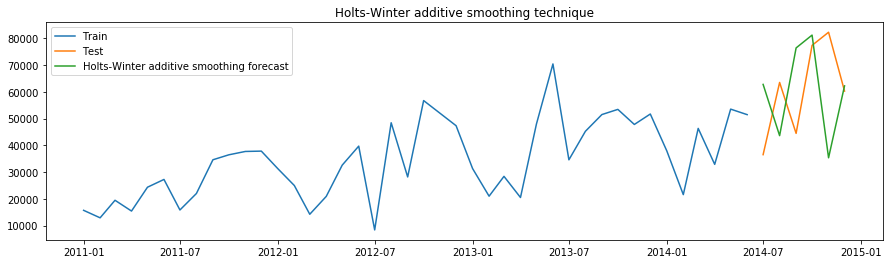

In [32]:
## plot train, test and forecast
plt.figure(figsize=(15,4))
plt.plot(train_df['Sales'], label='Train')
plt.plot(test_df['Sales'], label='Test')
plt.plot(y_hwa['HWA Forecast'], label='Holts-Winter additive smoothing forecast')
plt.legend(loc='best')
plt.title('Holts-Winter additive smoothing technique')
plt.show()

In [33]:
mape = np.round(np.mean(np.abs(test_df['Sales'] - y_hwa['HWA Forecast'])/test_df['Sales'])*100, 2)

hwa_result = pd.DataFrame({'Method': ['Holts-Winter Additive smoothing'], 'MAPE': mape})
results = pd.concat([results, hwa_result])
results

,Method,MAPE
0,Naive method,26.86
0,Simple Average method,38.18
0,Simple Moving Average method,27.40
0,Simple exponential smoothing,27.28
0,Holt exponential smoothing,24.63
0,Holts-Winter Additive smoothing,40.05


#### 7. Holt-Winter's Multiplicative Method (Trend+Seassonality)

In [34]:
y_hwm = test_df.copy()
model = ExponentialSmoothing(np.array(test_df['Sales']), seasonal_periods=5, trend='add', seasonal='mul')
model_fit = model.fit(smoothing_level=0.001, smoothing_slope=0.002, smoothing_seasonal=0.001, optimized=False)
model_fit.params

{'smoothing_level': 0.001,
 'smoothing_slope': 0.002,
 'smoothing_seasonal': 0.001,
 'damping_slope': nan,
 'initial_level': 48408.2169,
 'initial_slope': -109.15495199999505,
 'initial_seasons': array([0.75450626, 1.31221055, 0.9187958 , 1.59848541, 1.69984279]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [35]:
y_hwm['HWM Forecast'] = model_fit.forecast(6)

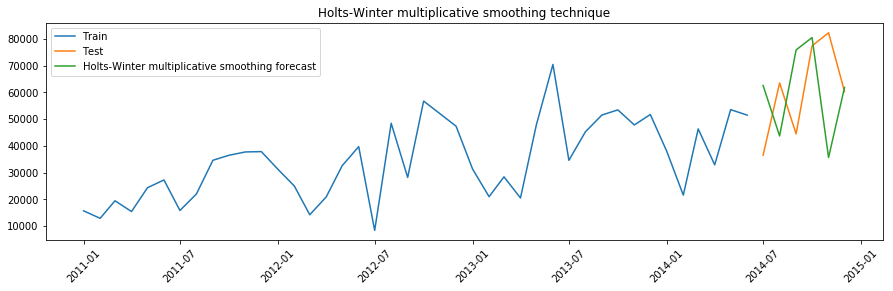

In [36]:
## plot train, test and forecast
plt.figure(figsize=(15,4))
plt.plot(train_df['Sales'], label='Train')
plt.plot(test_df['Sales'], label='Test')
plt.plot(y_hwm['HWM Forecast'], label='Holts-Winter multiplicative smoothing forecast')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.title('Holts-Winter multiplicative smoothing technique')
plt.show()

In [37]:
mape = np.round(np.mean(np.abs(test_df['Sales'] - y_hwm['HWM Forecast'])/test_df['Sales'])*100, 2)

hwm_result = pd.DataFrame({'Method': ['Holts-Winter Multiplicative smoothing'], 'MAPE': mape})
results = pd.concat([results, hwm_result])
results

,Method,MAPE
0,Naive method,26.86
0,Simple Average method,38.18
0,Simple Moving Average method,27.40
0,Simple exponential smoothing,27.28
0,Holt exponential smoothing,24.63
0,Holts-Winter Additive smoothing,40.05
0,Holts-Winter Multiplicative smoothing,39.39


### Stationary vs Non Stationary

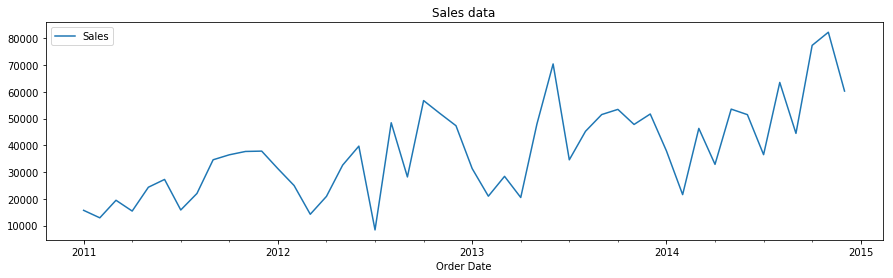

In [38]:
APAC_Consumer.plot(y='Sales', figsize=(15,4))
plt.legend(loc='best')
plt.title('Sales data')
plt.show()

#### Augmented Dickey-Fuller (ADF) test

In [39]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(APAC_Consumer['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values at 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -2.220857
Critical Values at 0.05: -2.93
p-value: 0.198763


#### KPSS test

In [40]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(APAC_Consumer['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values at 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.595515
Critical Values at 0.05: 0.46
p-value: 0.023044


#### Box Cox transformation to make variance constant

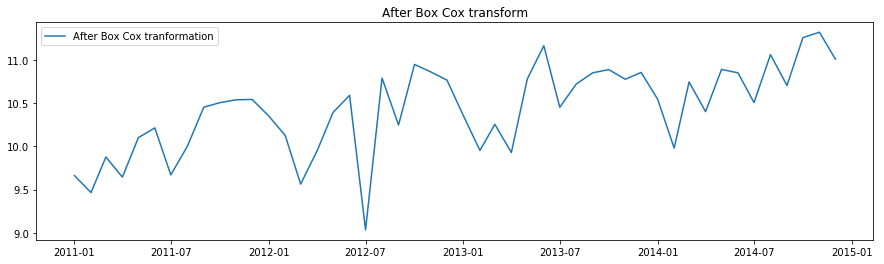

In [41]:
from scipy.stats import boxcox

data_boxcox = pd.Series(boxcox(APAC_Consumer['Sales'], lmbda=0), index = APAC_Consumer.index)

plt.figure(figsize=(15,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

#### Differencing to remove trend

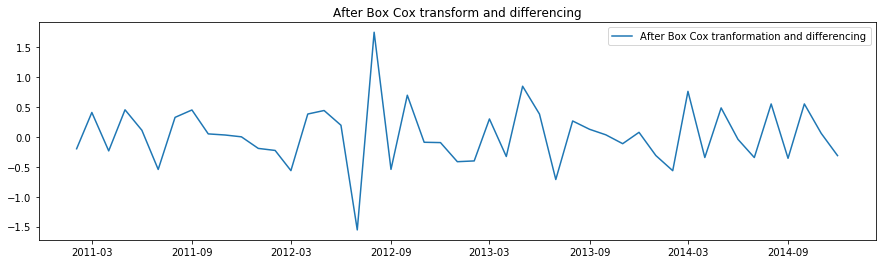

In [42]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), APAC_Consumer.index)
plt.figure(figsize=(15,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [43]:
data_boxcox_diff.dropna(inplace=True)

In [44]:
data_boxcox_diff.tail()

Order Date
2014-08-01    0.553405
2014-09-01   -0.356405
2014-10-01    0.553748
2014-11-01    0.061479
2014-12-01   -0.311004
dtype: float64

#### Augmented Dickey-Fuller (ADF) test

In [45]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values at 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -5.769275
Critical Values at 0.05: -2.95
p-value: 0.000001


#### KPSS test

In [46]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values at 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.135659
Critical Values at 0.05: 0.46
p-value: 0.100000


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### Autocorrelation
#### Autocorrelation function (ACF)

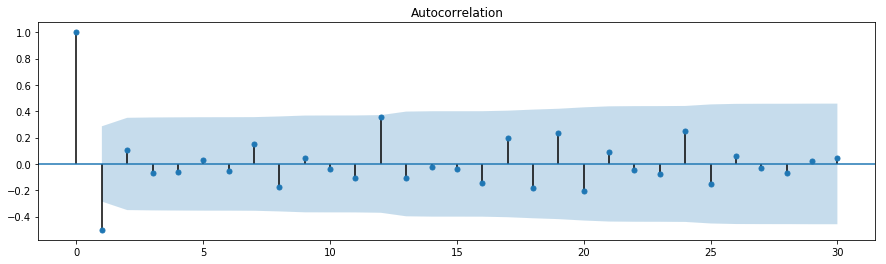

In [47]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(15,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

#### Partial Autocorrelation Function (PACF)

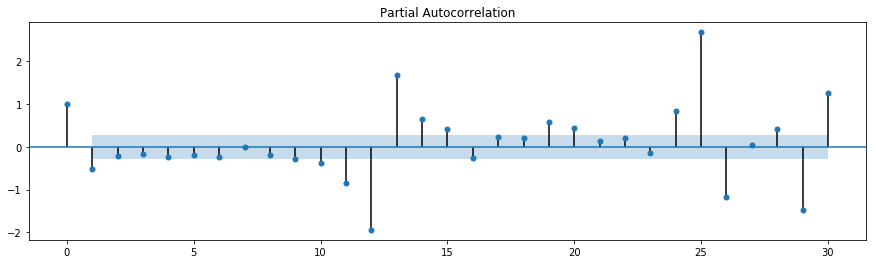

In [48]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(15,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

#### Split into train and test data set

In [49]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

### ARIMA set of techniques
#### 1. Auto Regression model (AR)

In [50]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.031320
ar.L1.y   -0.483978
dtype: float64


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [51]:
# Recover original time series
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

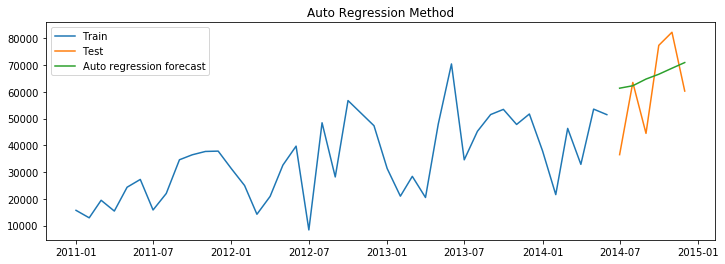

In [52]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train_df['Sales'], label='Train')
plt.plot(test_df['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test_df.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [53]:
mape = np.round(np.mean(np.abs(test_df['Sales']-y_hat_ar['ar_forecast'][test_df.index.min():])/test_df['Sales'])*100,2)

ar_results = pd.DataFrame({'Method': ['Autoregressive (AR) method'], 'MAPE': mape })
results = pd.concat([results, ar_results])
results

,Method,MAPE
0,Naive method,26.86
0,Simple Average method,38.18
0,Simple Moving Average method,27.40
0,Simple exponential smoothing,27.28
0,Holt exponential smoothing,24.63
0,Holts-Winter Additive smoothing,40.05
0,Holts-Winter Multiplicative smoothing,39.39
0,Autoregressive (AR) method,27.27


#### 2. Moving average method (MA)

In [54]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.022694
ma.L1.y   -1.000000
dtype: float64


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [55]:
# Recover original time series
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

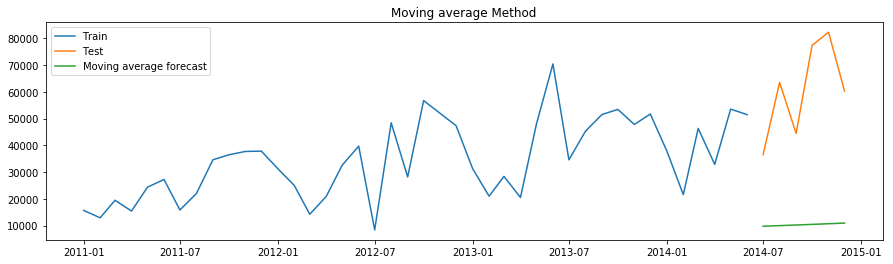

In [56]:
# Plot train, test and forecast
plt.figure(figsize=(15,4))
plt.plot(train_df['Sales'], label='Train')
plt.plot(test_df['Sales'], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test_df.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving average Method')
plt.show()

In [57]:
mape = np.round(np.mean(np.abs(test_df['Sales']-y_hat_ma['ma_forecast'][test_df.index.min():])/test_df['Sales'])*100,2)

ma_results = pd.DataFrame({'Method': ['Moving Average (MA) method'], 'MAPE': mape})
results = pd.concat([results, ma_results])
results

,Method,MAPE
0,Naive method,26.86
0,Simple Average method,38.18
0,Simple Moving Average method,27.40
0,Simple exponential smoothing,27.28
0,Holt exponential smoothing,24.63
0,Holts-Winter Additive smoothing,40.05
0,Holts-Winter Multiplicative smoothing,39.39
0,Autoregressive (AR) method,27.27
0,Moving Average (MA) method,81.64


#### 3. Auto regression moving average method (ARMA)

In [58]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const      0.022810
ar.L1.y    0.115922
ma.L1.y   -0.999998
dtype: float64


In [59]:
# Recover original time series
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

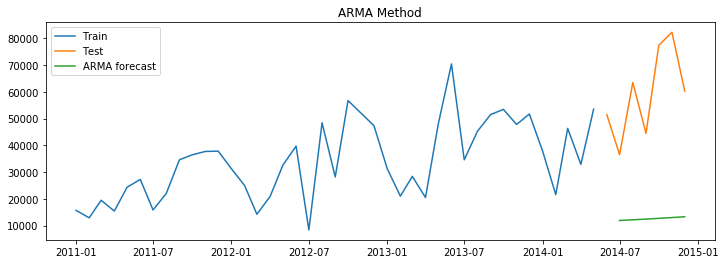

In [60]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( APAC_Consumer['Sales'][:train_len-1], label='Train')
plt.plot(APAC_Consumer['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test_df.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

In [61]:
mape = np.round(np.mean(np.abs(test_df['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test_df['Sales'])*100,2)

arma_results = pd.DataFrame({'Method': ['Autoregressive moving average (ARMA) method'], 'MAPE': mape})
results = pd.concat([results, arma_results])
results

,Method,MAPE
0,Naive method,26.86
0,Simple Average method,38.18
0,Simple Moving Average method,27.40
0,Simple exponential smoothing,27.28
0,Holt exponential smoothing,24.63
0,Holts-Winter Additive smoothing,40.05
0,Holts-Winter Multiplicative smoothing,39.39
0,Autoregressive (AR) method,27.27
0,Moving Average (MA) method,81.64
0,Autoregressive moving average (ARMA) method,77.66


#### 4. Auto regressive integrated moving average (ARIMA)

In [62]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const        0.022810
ar.L1.D.y    0.115922
ma.L1.D.y   -0.999998
dtype: float64


In [63]:
# Recover original time series forecast
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

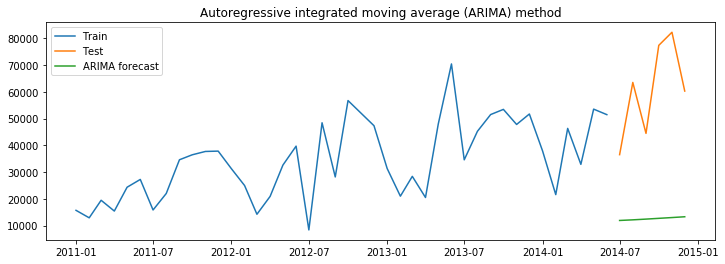

In [64]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train_df['Sales'], label='Train')
plt.plot(test_df['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test_df.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

In [65]:
mape = np.round(np.mean(np.abs(test_df['Sales']-y_hat_arima['arima_forecast'][test_df.index.min():])/test_df['Sales'])*100,2)

arima_results = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'MAPE': mape})
results = pd.concat([results, arima_results])
results

,Method,MAPE
0,Naive method,26.86
0,Simple Average method,38.18
0,Simple Moving Average method,27.40
0,Simple exponential smoothing,27.28
0,Holt exponential smoothing,24.63
0,Holts-Winter Additive smoothing,40.05
0,Holts-Winter Multiplicative smoothing,39.39
0,Autoregressive (AR) method,27.27
0,Moving Average (MA) method,81.64
0,Autoregressive moving average (ARMA) method,77.66


#### 5. Seasonal auto regressive integrated moving average (SARIMA)

In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 6)) 
model_fit = model.fit()
print(model_fit.params)

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ar.L1     -0.174066
ma.L1     -0.994338
ar.S.L6   -0.540262
ma.S.L6   -0.998386
sigma2     0.082734
dtype: float64


In [67]:
# Recover original time series forecast
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

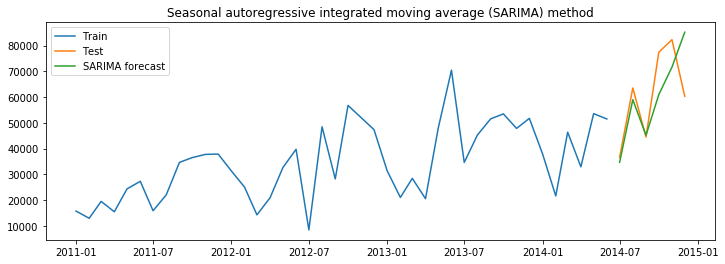

In [68]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train_df['Sales'], label='Train')
plt.plot(test_df['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test_df.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

In [69]:
mape = np.round(np.mean(np.abs(test_df['Sales']-y_hat_sarima['sarima_forecast'][test_df.index.min():])/test_df['Sales'])*100,2)

sarima_results = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'MAPE': mape})
results = pd.concat([results, sarima_results])
sale_results = results
sale_results

,Method,MAPE
0,Naive method,26.86
0,Simple Average method,38.18
0,Simple Moving Average method,27.40
0,Simple exponential smoothing,27.28
0,Holt exponential smoothing,24.63
0,Holts-Winter Additive smoothing,40.05
0,Holts-Winter Multiplicative smoothing,39.39
0,Autoregressive (AR) method,27.27
0,Moving Average (MA) method,81.64
0,Autoregressive moving average (ARMA) method,77.66


**Observation**
- The technique which works best for sales forecast is SARIMA as it has less MAPE value compared to others.
- From graph also we can see that forecast is most accurate with SARIMA.

### Time Series Analysis for Quantity forecast
#### Time Series plot for Quantity

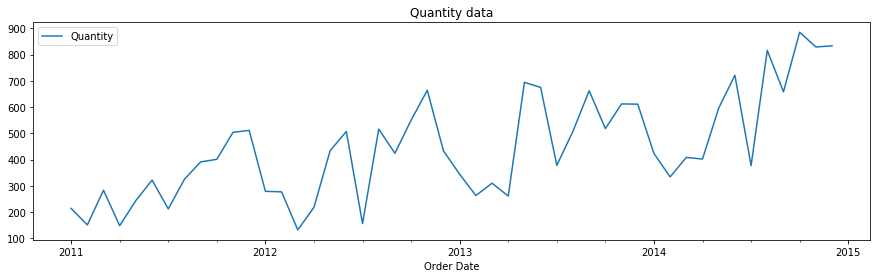

In [70]:
APAC_Consumer.plot(y='Quantity', figsize=(15,4))
plt.legend(loc='best')
plt.title('Quantity data')
plt.show()

### Time Series Decomposition
#### 1. Additive

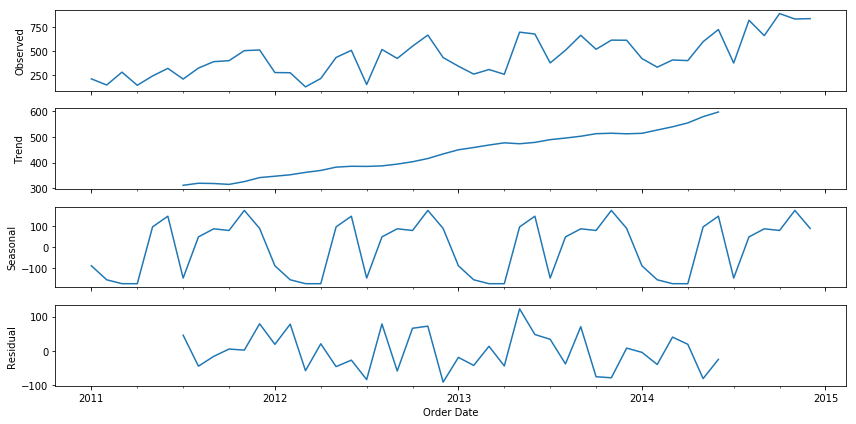

In [71]:
rcParams['figure.figsize'] = 12,6
decomposition = sm.tsa.seasonal_decompose(APAC_Consumer['Quantity'], model='additive')
decomposition.plot()
plt.show()

#### 2. Multiplicative

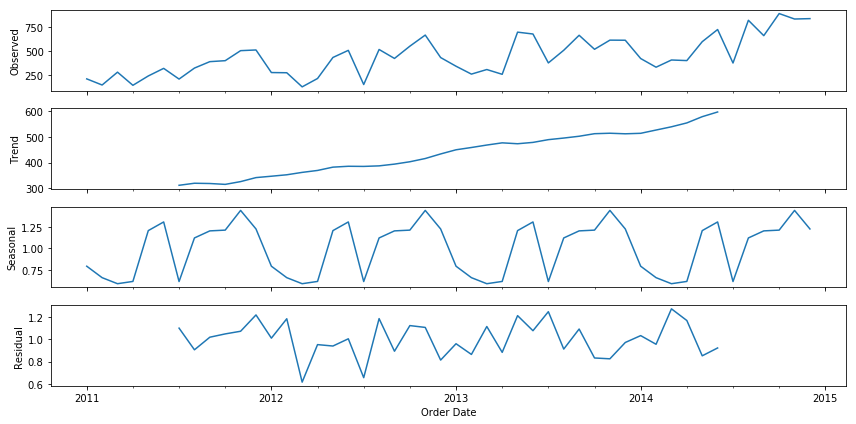

In [72]:
rcParams['figure.figsize'] = 12,6
decomposition = sm.tsa.seasonal_decompose(APAC_Consumer['Quantity'], model='multiplicative')
decomposition.plot()
plt.show()

#### Train and test split

In [73]:
train_len = 42
train_df = APAC_Consumer[0:train_len]
test_df = APAC_Consumer[train_len:]

### Smoothing Techniques
#### 1. Naive Method

In [74]:
y_naive = test_df.copy()
y_naive['Naive Forecast'] = train_df['Quantity'][train_len-1]

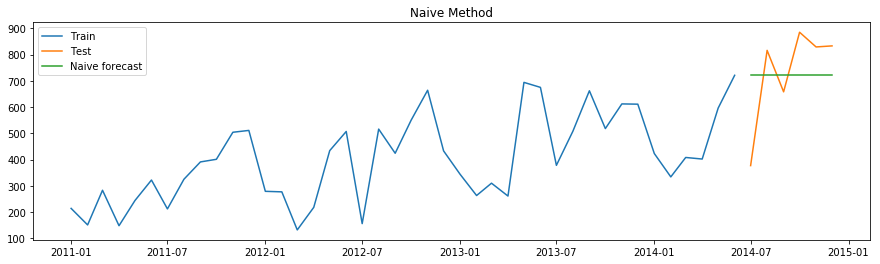

In [75]:
## plot train, test and forecast
plt.figure(figsize=(15,4))
plt.plot(train_df['Quantity'], label='Train')
plt.plot(test_df['Quantity'], label='Test')
plt.plot(y_naive['Naive Forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [76]:
mape = np.round(np.mean(np.abs(test_df['Quantity'] - y_naive['Naive Forecast'])/test_df['Quantity'])*100, 2)

naive_result = pd.DataFrame({'Method': ['Naive method'], 'MAPE': mape})
naive_result

,Method,MAPE
0,Naive method,26.24


#### 2. Simple Average Method

In [77]:
y_avg = test_df.copy()
y_avg['Avg Forecast'] = train_df['Quantity'].mean()

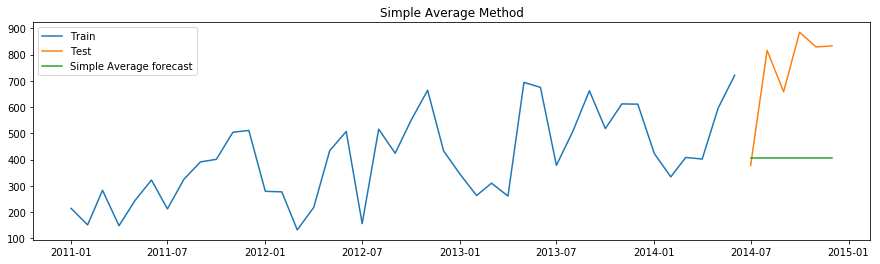

In [78]:
## plot train, test and forecast
plt.figure(figsize=(15,4))
plt.plot(train_df['Quantity'], label='Train')
plt.plot(test_df['Quantity'], label='Test')
plt.plot(y_avg['Avg Forecast'], label='Simple Average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [79]:
mape = np.round(np.mean(np.abs(test_df['Quantity'] - y_avg['Avg Forecast'])/test_df['Quantity'])*100, 2)

avg_result = pd.DataFrame({'Method': ['Simple Average method'], 'MAPE': mape})
results = pd.concat([naive_result, avg_result])
results

,Method,MAPE
0,Naive method,26.24
0,Simple Average method,42.16


#### 3. Simple Moving Average Method

In [80]:
y_sma = APAC_Consumer.copy()
ma_window = 3
y_sma['sma forecast'] = APAC_Consumer['Quantity'].rolling(ma_window).mean()
y_sma['sma forecast'][train_len:] = y_sma['sma forecast'][train_len]

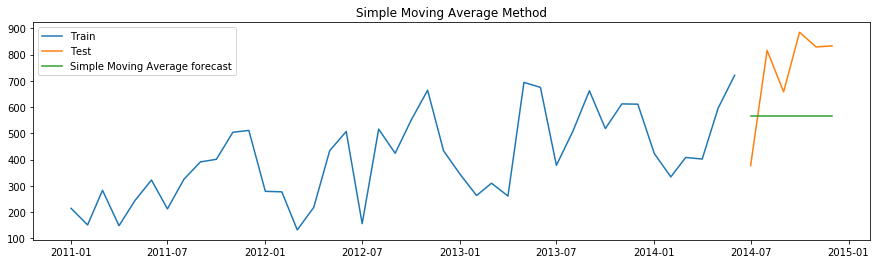

In [81]:
## plot train, test and forecast
plt.figure(figsize=(15,4))
plt.plot(train_df['Quantity'], label='Train')
plt.plot(test_df['Quantity'], label='Test')
plt.plot(y_sma['sma forecast'][train_len:], label='Simple Moving Average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [82]:
mape = np.round(np.mean(np.abs(test_df['Quantity'] - y_sma['sma forecast'][train_len:])/test_df['Quantity'])*100, 2)

sma_result = pd.DataFrame({'Method': ['Simple Moving Average method'], 'MAPE': mape})
results = pd.concat([results, sma_result])
results

,Method,MAPE
0,Naive method,26.24
0,Simple Average method,42.16
0,Simple Moving Average method,32.51


#### 4. Simple Exponential Smoothing Technique

In [83]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train_df['Quantity'])
model_fit = model.fit(smoothing_level=0.5)
model_fit.params

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


{'smoothing_level': 0.5,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 206.54810089196053,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [84]:
y_ses = test_df.copy()
y_ses['SES Forecast'] = model_fit.forecast(6) # no months we need to forecast

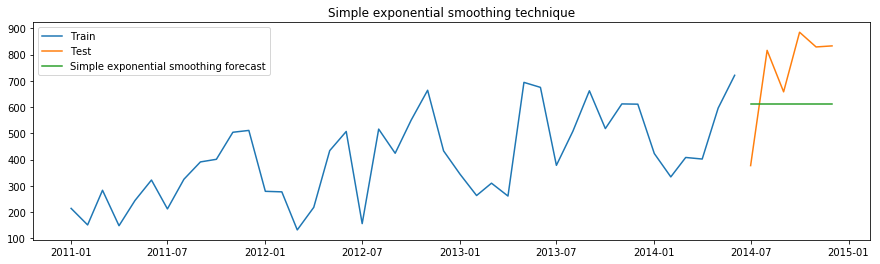

In [85]:
## plot train, test and forecast
plt.figure(figsize=(15,4))
plt.plot(train_df['Quantity'], label='Train')
plt.plot(test_df['Quantity'], label='Test')
plt.plot(y_ses['SES Forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple exponential smoothing technique')
plt.show()

In [86]:
mape = np.round(np.mean(np.abs(test_df['Quantity'] - y_ses['SES Forecast'])/test_df['Quantity'])*100, 2)

ses_result = pd.DataFrame({'Method': ['Simple exponential smoothing'], 'MAPE': mape})
results = pd.concat([results, ses_result])
results

,Method,MAPE
0,Naive method,26.24
0,Simple Average method,42.16
0,Simple Moving Average method,32.51
0,Simple exponential smoothing,29.67


#### 5. Holt's exponential smoothing technique

In [87]:
from statsmodels.tsa.holtwinters import  ExponentialSmoothing

model = ExponentialSmoothing(np.array(train_df['Quantity']), seasonal_periods=5, trend='additive', seasonal=None)
model_fit = model.fit()
model_fit.params

{'smoothing_level': 5.352857460079636e-09,
 'smoothing_slope': 8.235165323199444e-10,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 233.10010611573713,
 'initial_slope': 8.00197873904109,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [88]:
y_holt = test_df.copy()
y_holt['hes forecast'] = model_fit.forecast(6)

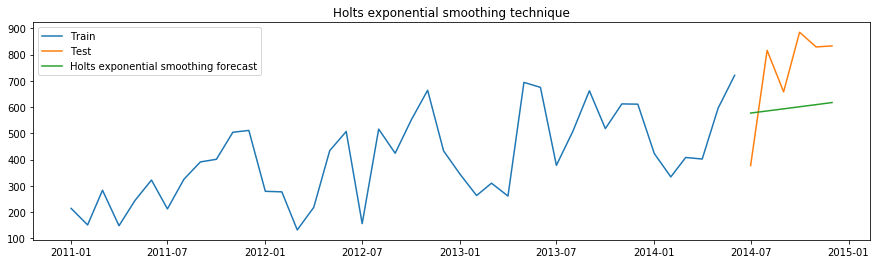

In [89]:
## plot train, test and forecast
plt.figure(figsize=(15,4))
plt.plot(train_df['Quantity'], label='Train')
plt.plot(test_df['Quantity'], label='Test')
plt.plot(y_holt['hes forecast'], label='Holts exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holts exponential smoothing technique')
plt.show()

In [90]:
mape = np.round(np.mean(np.abs(test_df['Quantity'] - y_holt['hes forecast'])/test_df['Quantity'])*100, 2)

holt_result = pd.DataFrame({'Method': ['Holt exponential smoothing'], 'MAPE': mape})
results = pd.concat([results, holt_result])
results

,Method,MAPE
0,Naive method,26.24
0,Simple Average method,42.16
0,Simple Moving Average method,32.51
0,Simple exponential smoothing,29.67
0,Holt exponential smoothing,29.29


#### 6. Holt-Winter's Additive Method (Trend+Seassonality)

In [91]:
y_hwa = test_df.copy()
model = ExponentialSmoothing(np.array(test_df['Quantity']), seasonal_periods=5, trend='add', seasonal='add')
model_fit = model.fit()
model_fit.params

{'smoothing_level': 0.05263157894736842,
 'smoothing_slope': 0.05263157894736842,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 605.0,
 'initial_slope': 24.000000000000004,
 'initial_seasons': array([-228.,  211.,   53.,  280.,  224.]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [92]:
y_hwa['HWA Forecast'] = model_fit.forecast(6)

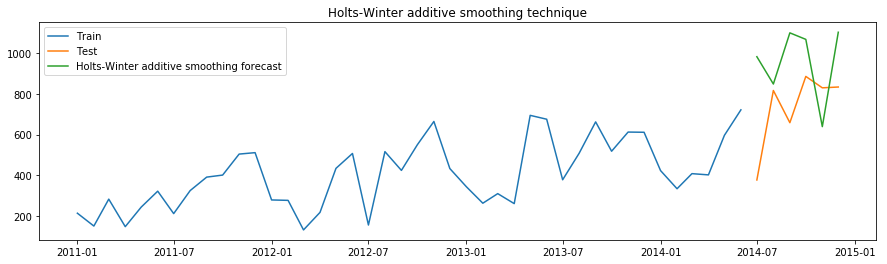

In [93]:
## plot train, test and forecast
plt.figure(figsize=(15,4))
plt.plot(train_df['Quantity'], label='Train')
plt.plot(test_df['Quantity'], label='Test')
plt.plot(y_hwa['HWA Forecast'], label='Holts-Winter additive smoothing forecast')
plt.legend(loc='best')
plt.title('Holts-Winter additive smoothing technique')
plt.show()

In [94]:
mape = np.round(np.mean(np.abs(test_df['Quantity'] - y_hwa['HWA Forecast'])/test_df['Quantity'])*100, 2)

hwa_result = pd.DataFrame({'Method': ['Holts-Winter Additive smoothing'], 'MAPE': mape})
results = pd.concat([results, hwa_result])
results

,Method,MAPE
0,Naive method,26.24
0,Simple Average method,42.16
0,Simple Moving Average method,32.51
0,Simple exponential smoothing,29.67
0,Holt exponential smoothing,29.29
0,Holts-Winter Additive smoothing,51.17


#### 7. Holt-Winter's Multiplicative Method (Trend+Seassonality)

In [95]:
y_hwm = test_df.copy()
model = ExponentialSmoothing(np.array(test_df['Quantity']), seasonal_periods=5, trend='add', seasonal='mul')
model_fit = model.fit()
model_fit.params

{'smoothing_level': 0.046634956420064495,
 'smoothing_slope': 0.046634956339916545,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 604.998296701353,
 'initial_slope': 24.017358879355736,
 'initial_seasons': array([0.90249499, 1.25910582, 0.97460167, 1.27272566, 1.15138225]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [96]:
y_hwm['HWM Forecast'] = model_fit.forecast(6)

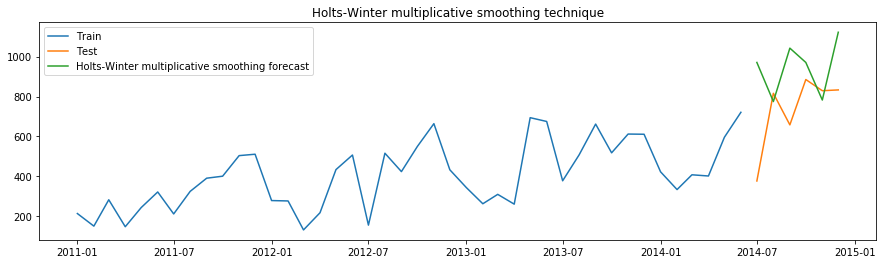

In [97]:
## plot train, test and forecast
plt.figure(figsize=(15,4))
plt.plot(train_df['Quantity'], label='Train')
plt.plot(test_df['Quantity'], label='Test')
plt.plot(y_hwm['HWM Forecast'], label='Holts-Winter multiplicative smoothing forecast')
plt.legend(loc='best')
plt.title('Holts-Winter multiplicative smoothing technique')
plt.show()

In [98]:
mape = np.round(np.mean(np.abs(test_df['Quantity'] - y_hwm['HWM Forecast'])/test_df['Quantity'])*100, 2)

hwm_result = pd.DataFrame({'Method': ['Holts-Winter Multiplicative smoothing'], 'MAPE': mape})
results = pd.concat([results, hwm_result])
results

,Method,MAPE
0,Naive method,26.24
0,Simple Average method,42.16
0,Simple Moving Average method,32.51
0,Simple exponential smoothing,29.67
0,Holt exponential smoothing,29.29
0,Holts-Winter Additive smoothing,51.17
0,Holts-Winter Multiplicative smoothing,45.14


### Stationary vs Non Stationary

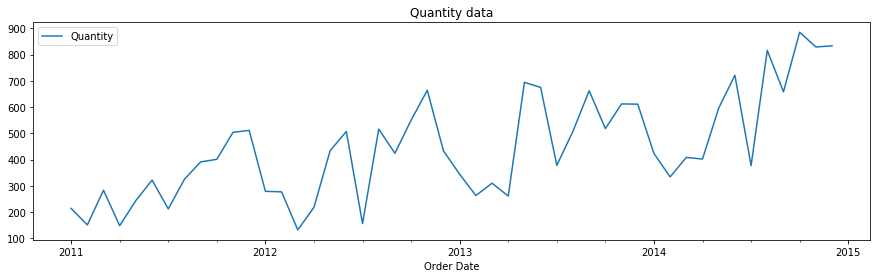

In [99]:
APAC_Consumer.plot(y='Quantity', figsize=(15,4))
plt.legend(loc='best')
plt.title('Quantity data')
plt.show()

#### Augmented Dickey-Fuller (ADF) test

In [100]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(APAC_Consumer['Quantity'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values at 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: 0.293145
Critical Values at 0.05: -2.94
p-value: 0.977028


#### KPSS test

In [101]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(APAC_Consumer['Quantity'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values at 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.593099
Critical Values at 0.05: 0.46
p-value: 0.023264


#### Box Cox transformation to make variance constant

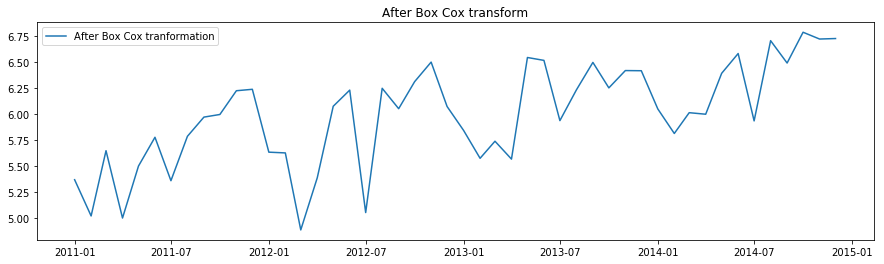

In [102]:
from scipy.stats import boxcox

data_boxcox = pd.Series(boxcox(APAC_Consumer['Quantity'], lmbda=0), index = APAC_Consumer.index)

plt.figure(figsize=(15,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

#### Differencing to remove trend

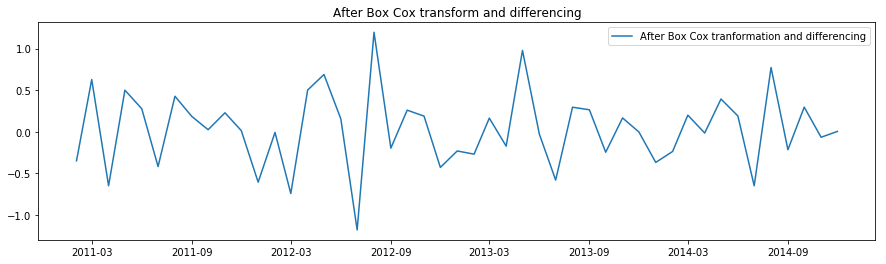

In [103]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), APAC_Consumer.index)
plt.figure(figsize=(15,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [104]:
data_boxcox_diff.dropna(inplace=True)

In [105]:
data_boxcox_diff.tail()

Order Date
2014-08-01    0.772169
2014-09-01   -0.215209
2014-10-01    0.296383
2014-11-01   -0.065367
2014-12-01    0.004813
dtype: float64

#### Augmented Dickey-Fuller (ADF) test

In [106]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values at 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -6.731694
Critical Values at 0.05: -2.95
p-value: 0.000000


#### KPSS test

In [107]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values at 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.157717
Critical Values at 0.05: 0.46
p-value: 0.100000


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### Autocorrelation
#### Autocorrelation function (ACF)

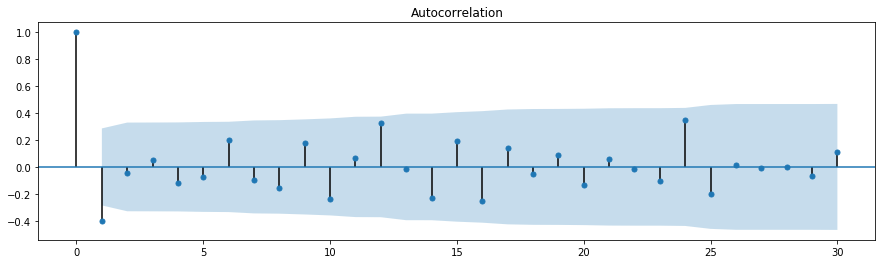

In [108]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(15,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

#### Partial Autocorrelation Function (PACF)

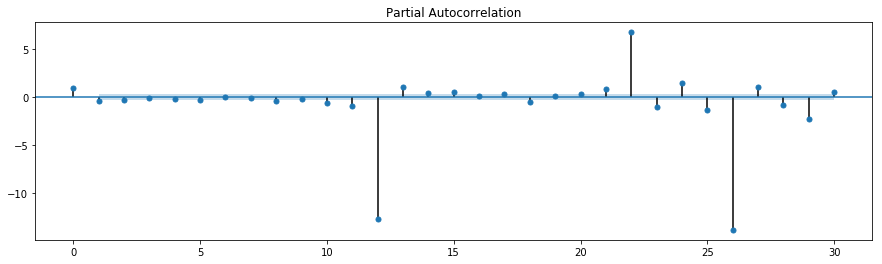

In [109]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(15,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

In [110]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

### ARIMA set of techniques
#### 1. Auto Regression model (AR)

In [111]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.031031
ar.L1.y   -0.354124
dtype: float64


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [112]:
# Recover original time series
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

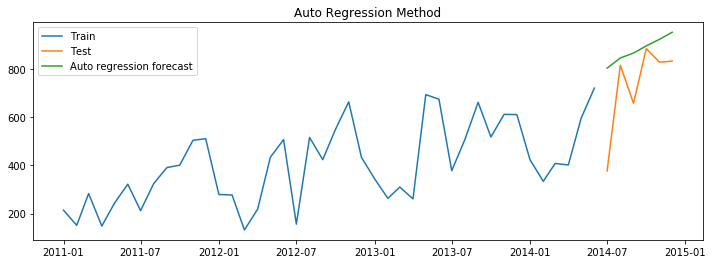

In [113]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train_df['Quantity'], label='Train')
plt.plot(test_df['Quantity'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test_df.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [114]:
mape = np.round(np.mean(np.abs(test_df['Quantity']-y_hat_ar['ar_forecast'][test_df.index.min():])/test_df['Quantity'])*100,2)

ar_results = pd.DataFrame({'Method': ['Autoregressive (AR) method'], 'MAPE': mape })
results = pd.concat([results, ar_results])
results

,Method,MAPE
0,Naive method,26.24
0,Simple Average method,42.16
0,Simple Moving Average method,32.51
0,Simple exponential smoothing,29.67
0,Holt exponential smoothing,29.29
0,Holts-Winter Additive smoothing,51.17
0,Holts-Winter Multiplicative smoothing,45.14
0,Autoregressive (AR) method,29.30


#### 2. Moving average method (MA)

In [115]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.022029
ma.L1.y   -1.000000
dtype: float64


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [116]:
# Recover original time series
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

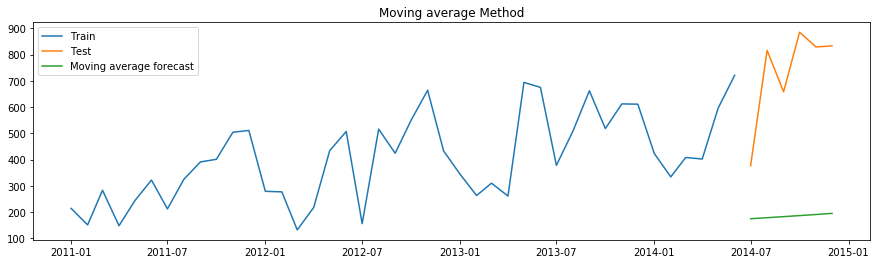

In [117]:
# Plot train, test and forecast
plt.figure(figsize=(15,4))
plt.plot(train_df['Quantity'], label='Train')
plt.plot(test_df['Quantity'], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test_df.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving average Method')
plt.show()

In [118]:
mape = np.round(np.mean(np.abs(test_df['Quantity']-y_hat_ma['ma_forecast'][test_df.index.min():])/test_df['Quantity'])*100,2)

ma_results = pd.DataFrame({'Method': ['Moving Average (MA) method'], 'MAPE': mape})
results = pd.concat([results, ma_results])
results

,Method,MAPE
0,Naive method,26.24
0,Simple Average method,42.16
0,Simple Moving Average method,32.51
0,Simple exponential smoothing,29.67
0,Holt exponential smoothing,29.29
0,Holts-Winter Additive smoothing,51.17
0,Holts-Winter Multiplicative smoothing,45.14
0,Autoregressive (AR) method,29.30
0,Moving Average (MA) method,72.76


#### 3. Auto regression moving average method (ARMA)

In [119]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const      0.022378
ar.L1.y    0.249097
ma.L1.y   -0.999953
dtype: float64


In [120]:
# Recover original time series
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

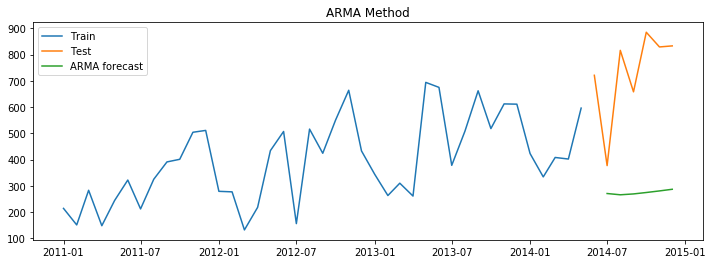

In [121]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( APAC_Consumer['Quantity'][:train_len-1], label='Train')
plt.plot(APAC_Consumer['Quantity'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test_df.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

In [122]:
mape = np.round(np.mean(np.abs(test_df['Quantity']-y_hat_arma['arma_forecast'][train_len-1:])/test_df['Quantity'])*100,2)

arma_results = pd.DataFrame({'Method': ['Autoregressive moving average (ARMA) method'], 'MAPE': mape})
results = pd.concat([results, arma_results])
results

,Method,MAPE
0,Naive method,26.24
0,Simple Average method,42.16
0,Simple Moving Average method,32.51
0,Simple exponential smoothing,29.67
0,Holt exponential smoothing,29.29
0,Holts-Winter Additive smoothing,51.17
0,Holts-Winter Multiplicative smoothing,45.14
0,Autoregressive (AR) method,29.30
0,Moving Average (MA) method,72.76
0,Autoregressive moving average (ARMA) method,59.24


#### 4. Auto regressive integrated moving average (ARIMA)

In [123]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const        0.022378
ar.L1.D.y    0.249097
ma.L1.D.y   -0.999953
dtype: float64


In [124]:
# Recover original time series forecast
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

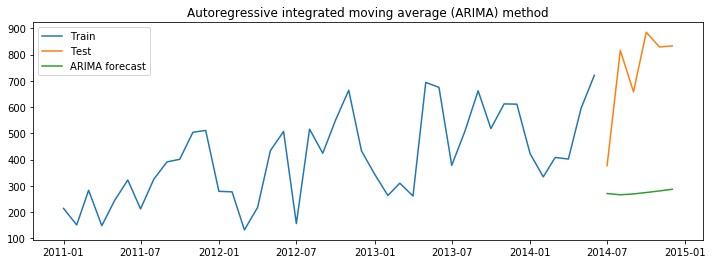

In [125]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train_df['Quantity'], label='Train')
plt.plot(test_df['Quantity'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test_df.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

In [126]:
mape = np.round(np.mean(np.abs(test_df['Quantity']-y_hat_arima['arima_forecast'][test_df.index.min():])/test_df['Quantity'])*100,2)

arima_results = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'MAPE': mape})
results = pd.concat([results, arima_results])
results

,Method,MAPE
0,Naive method,26.24
0,Simple Average method,42.16
0,Simple Moving Average method,32.51
0,Simple exponential smoothing,29.67
0,Holt exponential smoothing,29.29
0,Holts-Winter Additive smoothing,51.17
0,Holts-Winter Multiplicative smoothing,45.14
0,Autoregressive (AR) method,29.30
0,Moving Average (MA) method,72.76
0,Autoregressive moving average (ARMA) method,59.24


#### 5. Seasonal auto regressive integrated moving average (SARIMA)

In [127]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 6)) 
model_fit = model.fit()
print(model_fit.params)

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ar.L1     -0.182207
ma.L1     -0.997608
ar.S.L6   -0.650596
ma.S.L6   -0.995205
sigma2     0.058601
dtype: float64


In [128]:
# Recover original time series forecast
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

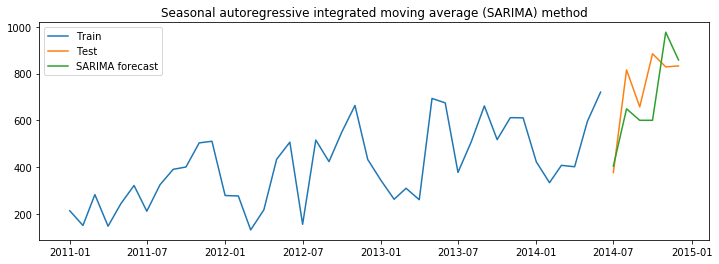

In [129]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train_df['Quantity'], label='Train')
plt.plot(test_df['Quantity'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test_df.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

In [130]:
mape = np.round(np.mean(np.abs(test_df['Quantity']-y_hat_sarima['sarima_forecast'][test_df.index.min():])/test_df['Quantity'])*100,2)

sarima_results = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'MAPE': mape})
results = pd.concat([results, sarima_results])
quantity_results = results
quantity_results

,Method,MAPE
0,Naive method,26.24
0,Simple Average method,42.16
0,Simple Moving Average method,32.51
0,Simple exponential smoothing,29.67
0,Holt exponential smoothing,29.29
0,Holts-Winter Additive smoothing,51.17
0,Holts-Winter Multiplicative smoothing,45.14
0,Autoregressive (AR) method,29.30
0,Moving Average (MA) method,72.76
0,Autoregressive moving average (ARMA) method,59.24


**Observation**
- The technique which works best for quantity forecast is SARIMA as it has less MAPE value compared to others.
- From graph also we can see that forecast is most accurate with SARIMA.